In [ ]:
pip install google drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: httplib2
    Found existing installation: httplib2 0.31.0
    Uninstalling httplib2-0.31.0:
      Successfully uninstalled httplib2-0.31.0


In [11]:
# ✅ Correct import
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

# ⚠️ Use Drive path, not Google Drive link!
# You must use the actual path inside your Drive, NOT the web URL.
# Example: '/content/drive/MyDrive/Banana Ripeness Classification Dataset'

drive_dataset = '/content/drive/MyDrive/Banana Ripeness Classification Dataset'
local_dataset = '/content/Banana Ripeness Classification Dataset'

if not os.path.exists(local_dataset):
    print('📦 Copying dataset from Drive to Colab local storage...')
    shutil.copytree(drive_dataset, local_dataset)
else:
    print('✅ Dataset already available locally.')

print('📂 Files in dataset folder:', len(os.listdir(local_dataset)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📦 Copying dataset from Drive to Colab local storage...
📂 Files in dataset folder: 5


In [ ]:
print(os.listdir(local_dataset))

['test', 'valid', 'train']


In [ ]:
pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
import os

# Paths
base_dir = "/content/Banana Ripeness Classification Dataset"
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [13]:
temp_train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/Banana Ripeness Classification Dataset/train',
    image_size = (224,224),
    batch_size = 32

)



Found 11793 files belonging to 4 classes.


In [14]:
#lets see class names

temp_raw_ds.class_names

NameError: name 'temp_raw_ds' is not defined

In [15]:
#applying cache and prefetch for training
AUTOTUNE=tf.data.AUTOTUNE

train_ds = temp_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
val_ds = image_dataset_from_directory(
    val_dir,
    image_size = (224,224),
    batch_size = 32
).cache().prefetch(buffer_size= AUTOTUNE)



Found 1123 files belonging to 4 classes.


In [17]:
test_ds = image_dataset_from_directory(
    test_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
)


Found 562 files belonging to 4 classes.


In [18]:
from tensorflow.keras import layers , models
IMG_SIZE = (224,224)
num_classes = len(temp_train_ds.class_names)


In [ ]:
num_classes

4

In [ ]:
#pretrained base

base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=IMG_SIZE +(3,) ,
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True,
    name='MobileNetV3Small')


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │          0 │ activation[0][0]  │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 56, 56,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 1, 1, 16)  │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 1, 1, 16)  │          0 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 56, 56,    │          0 │ re_lu[0][0],      │
│ (Multiply)          │ 16)               │            │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 56, 56,    │        256 │ expanded_conv_sq

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

In [ ]:
base_model.trainable = False

In [ ]:
#building final model

model = models.Sequential ([
    layers.Rescaling(1./255), #normalizeing pixel values
    base_model,
    layers.GlobalAveragePooling2D(),#reducing spaial dimensions
    layers.Dropout(0.3), ### prevent over fitting
    layers.Dense(num_classes,activation='softmax') # output layer

]

)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
EPOCHS = 5
history=model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS
)

Epoch 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 183s 411ms/step - accuracy: 0.3225 - loss: 1.3752 - val_accuracy: 0.3037 - val_loss: 1.3449
Epoch 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 140s 380ms/step - accuracy: 0.3353 - loss: 1.3464 - val_accuracy: 0.3313 - val_loss: 1.3279
Epoch 3/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 140s 380ms/step - accuracy: 0.3476 - loss: 1.3366 - val_accuracy: 0.3455 - val_loss: 1.3189
Epoch 4/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 142s 385ms/step - accuracy: 0.3539 - loss: 1.3340 - val_accuracy: 0.3535 - val_loss: 1.3210
Epoch 5/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 140s 380ms/step - accuracy: 0.3588 - loss: 1.3254 - val_accuracy: 0.3411 - val_loss: 1.3183


In [ ]:
model.save('/content/drive/MyDrive/Banana Ripeness Classification Dataset/epoch_05.keras')

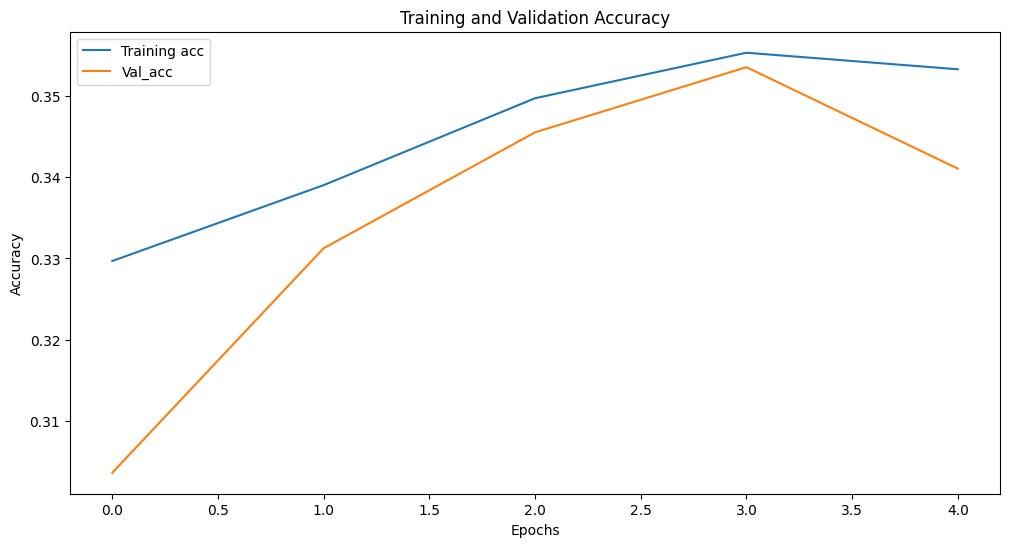

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'],label = 'Training acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Banana Ripeness Classification Dataset/epoch_05.keras')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

callbacks =[

            EarlyStopping(patience=3,restore_best_weights=True),
            ModelCheckpoint('/content/drive/MyDrive/Banana Ripeness Classification Dataset/best_model.keras',
                            save_best_only =True)
]

In [ ]:
history =model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15,
    initial_epoch=5,
    callbacks=callbacks)

Epoch 6/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 159s 411ms/step - accuracy: 0.3648 - loss: 1.3156 - val_accuracy: 0.4417 - val_loss: 1.3056
Epoch 7/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 194s 389ms/step - accuracy: 0.3666 - loss: 1.3213 - val_accuracy: 0.4337 - val_loss: 1.3048
Epoch 8/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 142s 386ms/step - accuracy: 0.3690 - loss: 1.3144 - val_accuracy: 0.3455 - val_loss: 1.3098
Epoch 9/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 199s 378ms/step - accuracy: 0.3726 - loss: 1.3178 - val_accuracy: 0.4354 - val_loss: 1.2947
Epoch 10/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 145s 394ms/step - accuracy: 0.3828 - loss: 1.3084 - val_accuracy: 0.3767 - val_loss: 1.2930
Epoch 11/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 142s 385ms/step - accuracy: 0.3763 - loss: 1.3027 - val_accuracy: 0.4435 - val_loss: 1.2897
Epoch 12/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 142s 385ms/step - accuracy: 0.3870 - loss: 1.2993 - val_accuracy: 0.4212 - val_loss: 1.2915
Epoch 13/15
369/369 ━━━━━━━━━━━━━━━━━━━━ 212s 412ms/step - accuracy: 0.38

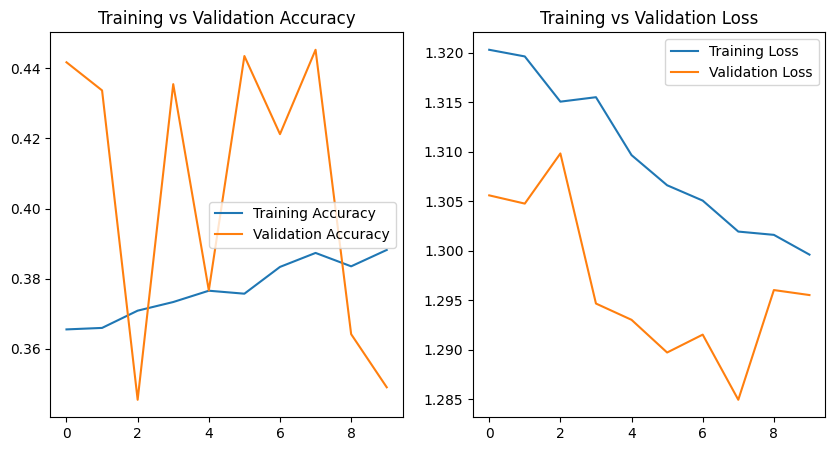

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


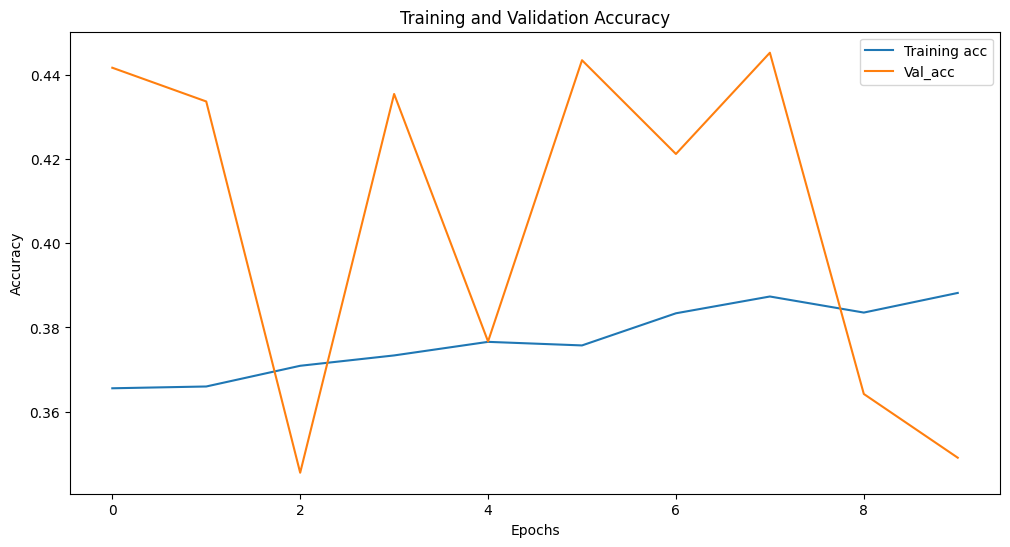

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'],label = 'Training acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    initial_epoch=10,
    callbacks=callbacks
)


Epoch 11/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 152s 413ms/step - accuracy: 0.3856 - loss: 1.2992 - val_accuracy: 0.4141 - val_loss: 1.2849
Epoch 12/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 192s 387ms/step - accuracy: 0.3926 - loss: 1.2987 - val_accuracy: 0.4533 - val_loss: 1.2847
Epoch 13/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 137s 371ms/step - accuracy: 0.3831 - loss: 1.3056 - val_accuracy: 0.4123 - val_loss: 1.2860
Epoch 14/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 143s 388ms/step - accuracy: 0.3902 - loss: 1.2976 - val_accuracy: 0.4577 - val_loss: 1.2753
Epoch 15/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 136s 368ms/step - accuracy: 0.3875 - loss: 1.2968 - val_accuracy: 0.4417 - val_loss: 1.2772
Epoch 16/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 141s 381ms/step - accuracy: 0.4003 - loss: 1.2926 - val_accuracy: 0.4577 - val_loss: 1.2690
Epoch 17/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 139s 374ms/step - accuracy: 0.3954 - loss: 1.2929 - val_accuracy: 0.4488 - val_loss: 1.2715
Epoch 18/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 134s 353ms/step - accuracy: 

In [ ]:
acc = history.history['accuracy'] + history2.history['accuracy']
val_acc = history.history['val_accuracy'] + history2.history['val_accuracy']

loss = history.history['loss'] + history2.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss']


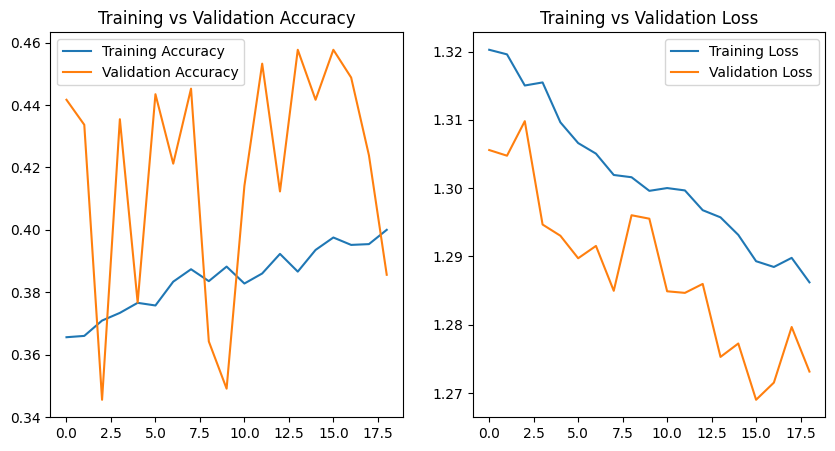

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(len(acc))

plt.figure(figsize=(10,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.listdir('/content/drive/MyDrive/Banana Ripeness Classification Dataset')


['valid', 'train', 'test', 'epoch_05.keras', 'best_model.keras']

In [19]:
from tensorflow.keras.models import load_model

# Load best model
best_model = load_model('/content/drive/MyDrive/Banana Ripeness Classification Dataset/best_model.keras')

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.2%}")
print(f"✅ Test Loss: {test_loss:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 410ms/step - accuracy: 0.4282 - loss: 1.2956
✅ Test Accuracy: 41.99%
✅ Test Loss: 1.3065


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


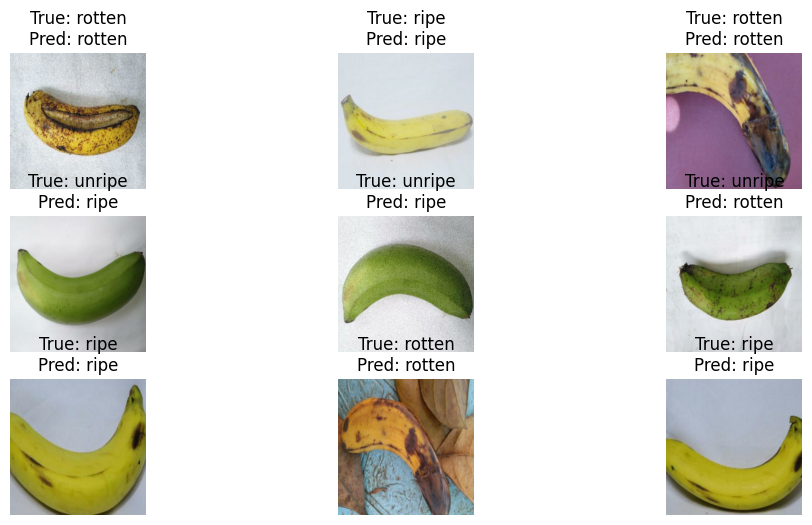

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class_names = test_ds.class_names  # reuse from earlier

for images, labels in test_ds.take(1):
    preds = best_model.predict(images)
    preds_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        pred_label = class_names[preds_labels[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.show()


In [21]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

with open('/content/drive/MyDrive/Banana Ripeness Classification Dataset/banana_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Saved TFLite model for mobile deployment!")


Saved artifact at '/tmp/tmpzoe__kho'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139795694859280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694860624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694860432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694860048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694861200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694859664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694860816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694861584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694859472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139795694862160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1397956948610

In [ ]:
help(tf.keras.utils.image_dataset_from_directory)


Help on function image_dataset_from_directory in module keras.src.utils.image_dataset_utils:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)
    Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:

    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```

    Then calling `image_dataset_from_directory(main_directory,
    labels='inferred')` will return a `tf.data.Dataset` that yields batches of
    images from the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `cl